In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cancer_data = pd.read_csv('cancer_data.csv')
cancer_data = cancer_data.drop(columns = ['Unnamed: 0'])
cancer_data = cancer_data.iloc[:, :12]
cancer_data.head()

,diagnosis,children,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,Yes,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,No,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,Yes,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,No,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,Yes,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


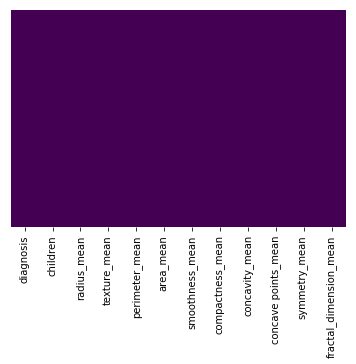

In [2]:

sns.heatmap(cancer_data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis') # Check the NA

In [3]:
children = pd.get_dummies(cancer_data['children'], drop_first = True)
cancer_data = pd.concat([cancer_data, children], axis = 1)
cancer_data = cancer_data.iloc[:,[0,2,3,6,7,8,9,10,11,12]]
cancer_data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Yes
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


In [4]:
#Normalization the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(cancer_data.drop(['diagnosis'], axis = 1))
scaled_features = scaler.transform(cancer_data.drop(['diagnosis'], axis = 1))
scaled_features

array([[ 1.09706398e+00, -2.07333501e+00,  1.56846633e+00, ...,
         2.21751501e+00,  2.25574689e+00,  1.05605002e+00],
       [ 1.82982061e+00, -3.53632408e-01, -8.26962447e-01, ...,
         1.39236330e-03, -8.68652457e-01, -9.46924847e-01],
       [ 1.57988811e+00,  4.56186952e-01,  9.42210440e-01, ...,
         9.39684817e-01, -3.98007910e-01,  1.05605002e+00],
       ...,
       [ 7.02284249e-01,  2.04557380e+00, -8.40483881e-01, ...,
        -8.09117071e-01, -8.95586935e-01,  1.05605002e+00],
       [ 1.83834103e+00,  2.33645719e+00,  1.52576706e+00, ...,
         2.13719425e+00,  1.04369542e+00,  1.05605002e+00],
       [-1.80840125e+00,  1.22179204e+00, -3.11208479e+00, ...,
        -8.20069901e-01, -5.61032377e-01, -9.46924847e-01]])

In [5]:
cancer_feat = pd.DataFrame(scaled_features, columns = cancer_data.columns[1:] )
cancer_feat.head()


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Yes
0,1.097064,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,1.056050
1,1.829821,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,-0.946925
2,1.579888,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.056050
3,-0.768909,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,-0.946925
4,1.750297,-1.151816,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.056050


In [6]:
#Split into training, testing set
from sklearn.model_selection import train_test_split
X = cancer_feat
y = cancer_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print("Training size: %d" %len(y_train))
print("Test size    : %d" %len(y_test))

Training size: 426
Test size    : 143


# Predict KNN with k=10

In [7]:
#Fitting the classifer into training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

#Predict the test set result
y_pred = classifier.predict(X_test)



In [8]:
#Making the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82  0]
 [14 47]]
             precision    recall  f1-score   support

          B       0.85      1.00      0.92        82
          M       1.00      0.77      0.87        61

avg / total       0.92      0.90      0.90       143



# Parameter Tuning with Cross Validation


In [9]:
# creating list of K for KNN
k_list = list(range(1,51,1))
# creating list of cv scores
cv_scores = []

from sklearn.model_selection import cross_val_score

# perform 10-fold cross validdtion
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

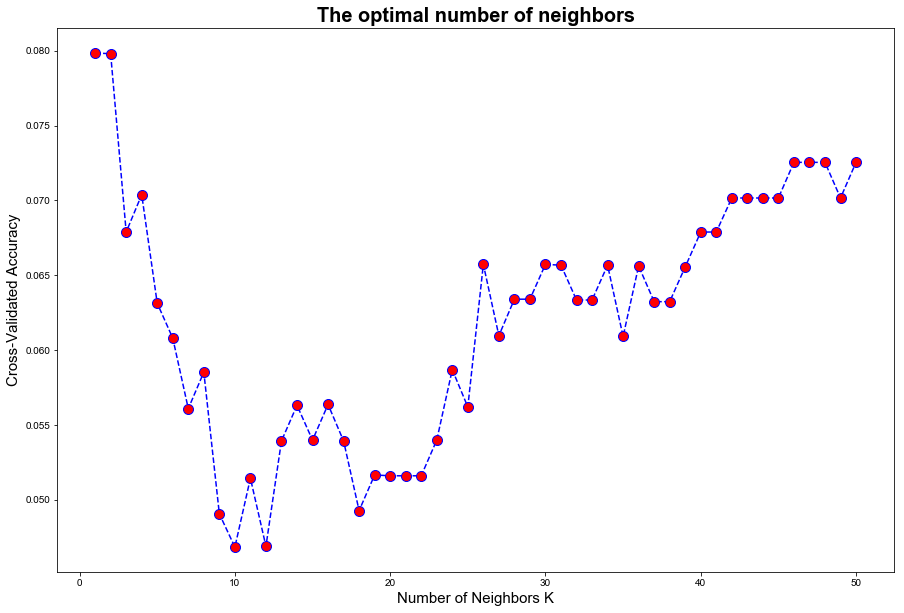

In [10]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Cross-Validated Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE, linestyle = 'dashed', marker = 'o', markerfacecolor ='red', color = 'blue', markersize = 10)
plt.show()

### k = 15

In [11]:
#Fitting the classifer into training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 31,  p=2)
classifier.fit(X_train, y_train)

#Predict the test set result
y_pred = classifier.predict(X_test)



In [12]:
#Making the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[82  0]
 [13 48]]
             precision    recall  f1-score   support

          B       0.86      1.00      0.93        82
          M       1.00      0.79      0.88        61

avg / total       0.92      0.91      0.91       143



## More efficient parameter tuning using GridSearchCV

In [13]:
from sklearn.model_selection import GridSearchCV

# define the parameter values that should be searched
k_range = list(range(1, 51))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [14]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]}


In [15]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [16]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [17]:
# view the complete results (list of named tuples)
grid.grid_scores_

C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.90685, std: 0.03543, params: {'n_neighbors': 1},
 mean: 0.92443, std: 0.02455, params: {'n_neighbors': 2},
 mean: 0.92619, std: 0.02024, params: {'n_neighbors': 3},
 mean: 0.92619, std: 0.03428, params: {'n_neighbors': 4},
 mean: 0.92267, std: 0.03535, params: {'n_neighbors': 5},
 mean: 0.92619, std: 0.03430, params: {'n_neighbors': 6},
 mean: 0.92970, std: 0.03811, params: {'n_neighbors': 7},
 mean: 0.93322, std: 0.03077, params: {'n_neighbors': 8},
 mean: 0.93673, std: 0.03328, params: {'n_neighbors': 9},
 mean: 0.93497, std: 0.03464, params: {'n_neighbors': 10},
 mean: 0.93849, std: 0.03573, params: {'n_neighbors': 11},
 mean: 0.94200, std: 0.03544, params: {'n_neighbors': 12},
 mean: 0.94025, std: 0.03948, params: {'n_neighbors': 13},
 mean: 0.93673, std: 0.04083, params: {'n_neighbors': 14},
 mean: 0.93322, std: 0.04055, params: {'n_neighbors': 15},
 mean: 0.93497, std: 0.04152, params: {'n_neighbors': 16},
 mean: 0.93146, std: 0.03793, params: {'n_neighbors': 17},
 mean:

In [18]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.9068541300527241, 0.9244288224956063, 0.9261862917398945, 0.9261862917398945, 0.9226713532513181, 0.9261862917398945, 0.929701230228471, 0.9332161687170475, 0.9367311072056239, 0.9349736379613357, 0.9384885764499121, 0.9420035149384886, 0.9402460456942003, 0.9367311072056239, 0.9332161687170475, 0.9349736379613357, 0.9314586994727593, 0.9349736379613357, 0.9332161687170475, 0.9349736379613357, 0.9332161687170475, 0.9420035149384886, 0.9384885764499121, 0.9402460456942003, 0.9367311072056239, 0.9384885764499121, 0.9384885764499121, 0.9402460456942003, 0.9384885764499121, 0.9332161687170475, 0.9349736379613357, 0.9314586994727593, 0.9367311072056239, 0.9314586994727593, 0.9367311072056239, 0.9314586994727593, 0.9367311072056239, 0.9367311072056239, 0.9332161687170475, 0.9332161687170475, 0.9314586994727593, 0.9332161687170475, 0.929701230228471, 0.9349736379613357, 0.9314586994727593, 0.9349736379613357, 0.9314586994727593, 0.9279437609841827, 0.929701230228471, 0.9261862917398945]


C:\Users\JFP1141\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

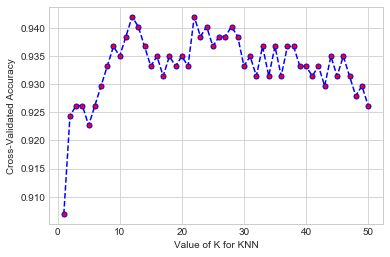

In [19]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, grid_mean_scores, linestyle = 'dashed', marker = 'o', markerfacecolor ='red', color = 'blue', markersize = 5)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [20]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9420035149384886
{'n_neighbors': 12}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')


### Searching multiple parameters simultaneously

In [21]:
# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [22]:
# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [23]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# Best score did not improve for this model

0.9420035149384886
{'n_neighbors': 12}


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import time
start = time.time()

clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=12, p=2,
           weights='uniform')
clf.fit(X_train, y_train)

prediction = clf.predict(X_test)
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')

end = time.time()

accuracy_all = []
cvs_all = []
accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))

Accuracy: 90.91%
Cross validation score: 94.23% (+/- 7.09%)
Execution time: 0.0366 seconds 

